Connect to google drive and import necessary libraries.

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Change working directory.

In [52]:
cd "C:\Users\Reuben\OneDrive - hull.ac.uk\Data Analysis & Visualisation\DAV Assessment\Cefas_smartbuoy"

C:\Users\Reuben\OneDrive - hull.ac.uk\Data Analysis & Visualisation\DAV Assessment\Cefas_smartbuoy


See current files in directory.

In [53]:
ls *.csv

 Volume in drive C has no label.
 Volume Serial Number is 2463-5455

 Directory of C:\Users\Reuben\OneDrive - hull.ac.uk\Data Analysis & Visualisation\DAV Assessment\Cefas_smartbuoy

19/12/2022  16:43        16,675,627 clean_data.csv
19/12/2022  16:43        14,492,341 clean_data1.csv
19/12/2022  16:43         3,732,617 clean_data2.csv
25/11/2022  15:10        23,158,205 interp_data.csv
25/11/2022  15:10       146,360,601 WESTGAB.csv
25/11/2022  15:10        15,097,489 WESTGAB_2.csv
25/11/2022  15:10        34,779,790 WESTGAB2.csv
25/11/2022  15:10         1,872,717 WESTGAB2_2.csv
25/11/2022  15:10        14,371,530 WESTGAB2PAR.csv
25/11/2022  15:10        42,393,256 WESTGABPAR.csv
25/11/2022  15:10         4,565,940 WG2O2SAT.csv
              11 File(s)    317,500,113 bytes
               0 Dir(s)  105,438,793,728 bytes free


In [54]:
westgab = pd.read_csv("WESTGAB.csv", parse_dates = ["dateTime"], encoding_errors = "ignore")
westgab.set_index("dateTime", inplace = True)
#westgab

Need to deal with encoding errors in order for file to open file. The causes are in the units column and can be ignored. Then we use the dateTime column to be of the date type and use this to index our files.

In [55]:
westgab = pd.read_csv("WESTGAB.csv", parse_dates = ["dateTime"], encoding_errors = "ignore")
westgab.set_index("dateTime", inplace = True)
westgab_2 = pd.read_csv("WESTGAB_2.csv", parse_dates = ["dateTime"], encoding_errors = "ignore")
westgab_2.set_index("dateTime", inplace = True)
westgabpar = pd.read_csv("WESTGABPAR.csv", parse_dates = ["dateTime"], encoding_errors = "ignore")
westgabpar.set_index("dateTime", inplace = True)

C:\Users\Reuben\AppData\Local\Temp\ipykernel_1140\1525487754.py:3: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  westgab_2 = pd.read_csv("WESTGAB_2.csv", parse_dates = ["dateTime"], encoding_errors = "ignore")


Now we extract the data associated with seperate parameters ("par") into seperate data frames before re-combining based on date. Then we make sure that our entries are numbers before saving to a csv. For each time point there are 3 different values of PAR corresponding to different 0, 1, and 2 metres depths so we'll make 3 columns for these.

In [56]:
westgab_temp = westgab[westgab["par"] == "TEMP"]
westgab_temp = westgab_temp["value"]
westgab_temp.name = "temp"
westgab_sal = westgab[westgab["par"] == "SAL"]
westgab_sal = westgab_sal["value"]
westgab_sal.name = "sal"
westgab_ftu = westgab[westgab["par"] == "FTU"]
westgab_ftu = westgab_ftu["value"]
westgab_ftu.name = "ftu"
westgab_fluors = westgab[westgab["par"] == "FLUORS"]
westgab_fluors = westgab_fluors["value"]
westgab_fluors.name = "fluors"
westgab_o2 = westgab[westgab["par"] == "O2CONC"]
westgab_o2 = westgab_o2["value"]
westgab_o2.name = "o2"

westgab_kd = westgab_2[westgab_2["par"] == "Kd"]
westgab_kd = westgab_kd["value"]
westgab_kd.name = "kd"
westgab_tox = westgab_2[westgab_2["par"] == "TOXN"]
westgab_tox = westgab_tox["value"]
westgab_tox.name = "tox"
westgab_sil = westgab_2[westgab_2["par"] == "SILICA"]
westgab_sil = westgab_sil["value"]
westgab_sil.name = "sil"

westgab_par_0 = westgabpar[westgabpar["depth"] == 0]
westgab_par_0 = westgab_par_0["value"]
westgab_par_0.name = "par_0"

westgab_par_1 = westgabpar[westgabpar["depth"] == 1]
westgab_par_1 = westgab_par_1["value"]
westgab_par_1.name = "par_1"

westgab_par_2 = westgabpar[westgabpar["depth"] == 2]
westgab_par_2 = westgab_par_2["value"]
westgab_par_2.name = "par_2"

merge1 = pd.merge(westgab_temp, westgab_sal, how = 'outer', left_index = True, right_index = True)
merge1 = pd.merge(merge1, westgab_ftu, how = 'outer', left_index = True, right_index = True)
merge1 = pd.merge(merge1, westgab_fluors, how = 'outer', left_index = True, right_index = True)
merge1 = pd.merge(merge1, westgab_o2, how = 'outer', left_index = True, right_index = True)
merge1 = pd.merge(merge1, westgab_kd, how = 'outer', left_index = True, right_index = True)
merge1 = pd.merge(merge1, westgab_tox, how = 'outer', left_index = True, right_index = True)
merge1 = pd.merge(merge1, westgab_sil, how = 'outer', left_index = True, right_index = True)
merge1 = pd.merge(merge1, westgab_par_0, how = 'outer', left_index = True, right_index = True)
merge1 = pd.merge(merge1, westgab_par_1, how = 'outer', left_index = True, right_index = True)
merge1 = pd.merge(merge1, westgab_par_2, how = 'outer', left_index = True, right_index = True)

merge1 = merge1.apply(pd.to_numeric, errors = 'raise')
merge1.to_csv("clean_data1.csv", sep = ",", index = "False")

We now do the exact same thing but for WESTGAB2.

In [57]:
westgab2 = pd.read_csv("WESTGAB2.csv", parse_dates = ["dateTime"], encoding_errors = "ignore")
westgab2.set_index("dateTime", inplace = True)
westgab2_2 = pd.read_csv("WESTGAB2_2.csv", parse_dates = ["dateTime"], encoding_errors = "ignore")
westgab2_2.set_index("dateTime", inplace = True)
westgab2par = pd.read_csv("WESTGAB2PAR.csv", parse_dates = ["dateTime"], encoding_errors = "ignore")
westgab2par.set_index("dateTime", inplace = True)

In [58]:
westgab2_temp = westgab2[westgab2["par"] == "TEMP"]
westgab2_temp = westgab2_temp["value"]
westgab2_temp.name = "temp"
westgab2_sal = westgab2[westgab2["par"] == "SAL"]
westgab2_sal = westgab2_sal["value"]
westgab2_sal.name = "sal"
westgab2_ftu = westgab2[westgab2["par"] == "FTU"]
westgab2_ftu = westgab2_ftu["value"]
westgab2_ftu.name = "ftu"
westgab2_fluors = westgab2[westgab2["par"] == "FLUORS"]
westgab2_fluors = westgab2_fluors["value"]
westgab2_fluors.name = "fluors"
westgab2_o2 = westgab2[westgab2["par"] == "O2CONC"]
westgab2_o2 = westgab2_o2["value"]
westgab2_o2.name = "o2"

westgab2_kd = westgab2_2[westgab2_2["par"] == "Kd"]
westgab2_kd = westgab2_kd["value"]
westgab2_kd.name = "kd"
westgab2_tox = westgab2_2[westgab2_2["par"] == "TOXN"]
westgab2_tox = westgab2_tox["value"]
westgab2_tox.name = "tox"
westgab2_sil = westgab2_2[westgab2_2["par"] == "SILICA"]
westgab2_sil = westgab2_sil["value"]
westgab2_sil.name = "sil"

westgab2_par_0 = westgab2par[westgab2par["depth"] == 0]
westgab2_par_0 = westgab2_par_0["value"]
westgab2_par_0.name = "par_0"

westgab2_par_1 = westgab2par[westgab2par["depth"] == 1]
westgab2_par_1 = westgab2_par_1["value"]
westgab2_par_1.name = "par_1"

westgab2_par_2 = westgab2par[westgab2par["depth"] == 2]
westgab2_par_2 = westgab2_par_2["value"]
westgab2_par_2.name = "par_2"

merge2 = pd.merge(westgab2_temp, westgab2_sal, how = 'outer', left_index = True, right_index = True)
merge2 = pd.merge(merge2, westgab2_ftu, how = 'outer', left_index = True, right_index = True)
merge2 = pd.merge(merge2, westgab2_fluors, how = 'outer', left_index = True, right_index = True)
merge2 = pd.merge(merge2, westgab2_o2, how = 'outer', left_index = True, right_index = True)
merge2 = pd.merge(merge2, westgab2_kd, how = 'outer', left_index = True, right_index = True)
merge2 = pd.merge(merge2, westgab2_tox, how = 'outer', left_index = True, right_index = True)
merge2 = pd.merge(merge2, westgab2_sil, how = 'outer', left_index = True, right_index = True)
merge2 = pd.merge(merge2, westgab2_par_0, how = 'outer', left_index = True, right_index = True)
merge2 = pd.merge(merge2, westgab2_par_1, how = 'outer', left_index = True, right_index = True)
merge2 = pd.merge(merge2, westgab2_par_2, how = 'outer', left_index = True, right_index = True)

merge2 = merge2.apply(pd.to_numeric, errors = 'raise')
merge2.to_csv("clean_data2.csv", sep = ",", index = "False")

In [59]:
df3 = pd.concat([merge1, merge2], axis = 0)
df3.to_csv("clean_data.csv", sep = ",", index = "False")

Finally we look at the proportion of missing data points for each of the columns. 

In [60]:
for col in df3.columns:
    print(f"Percentage of missing {col} values = {100*df3[col].isna().sum()/len(df3) :.2f}")

Percentage of missing temp values = 3.35
Percentage of missing sal values = 15.18
Percentage of missing ftu values = 17.29
Percentage of missing fluors values = 22.24
Percentage of missing o2 values = 68.91
Percentage of missing kd values = 70.38
Percentage of missing tox values = 93.48
Percentage of missing sil values = 99.53
Percentage of missing par_0 values = 72.11
Percentage of missing par_1 values = 60.21
Percentage of missing par_2 values = 58.87


From this we see that TOXN and SIL values at the least are severly defficient. Plotting these, as well as o2 and kd:

C:\Users\Reuben\AppData\Local\Temp\ipykernel_1140\4056148283.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


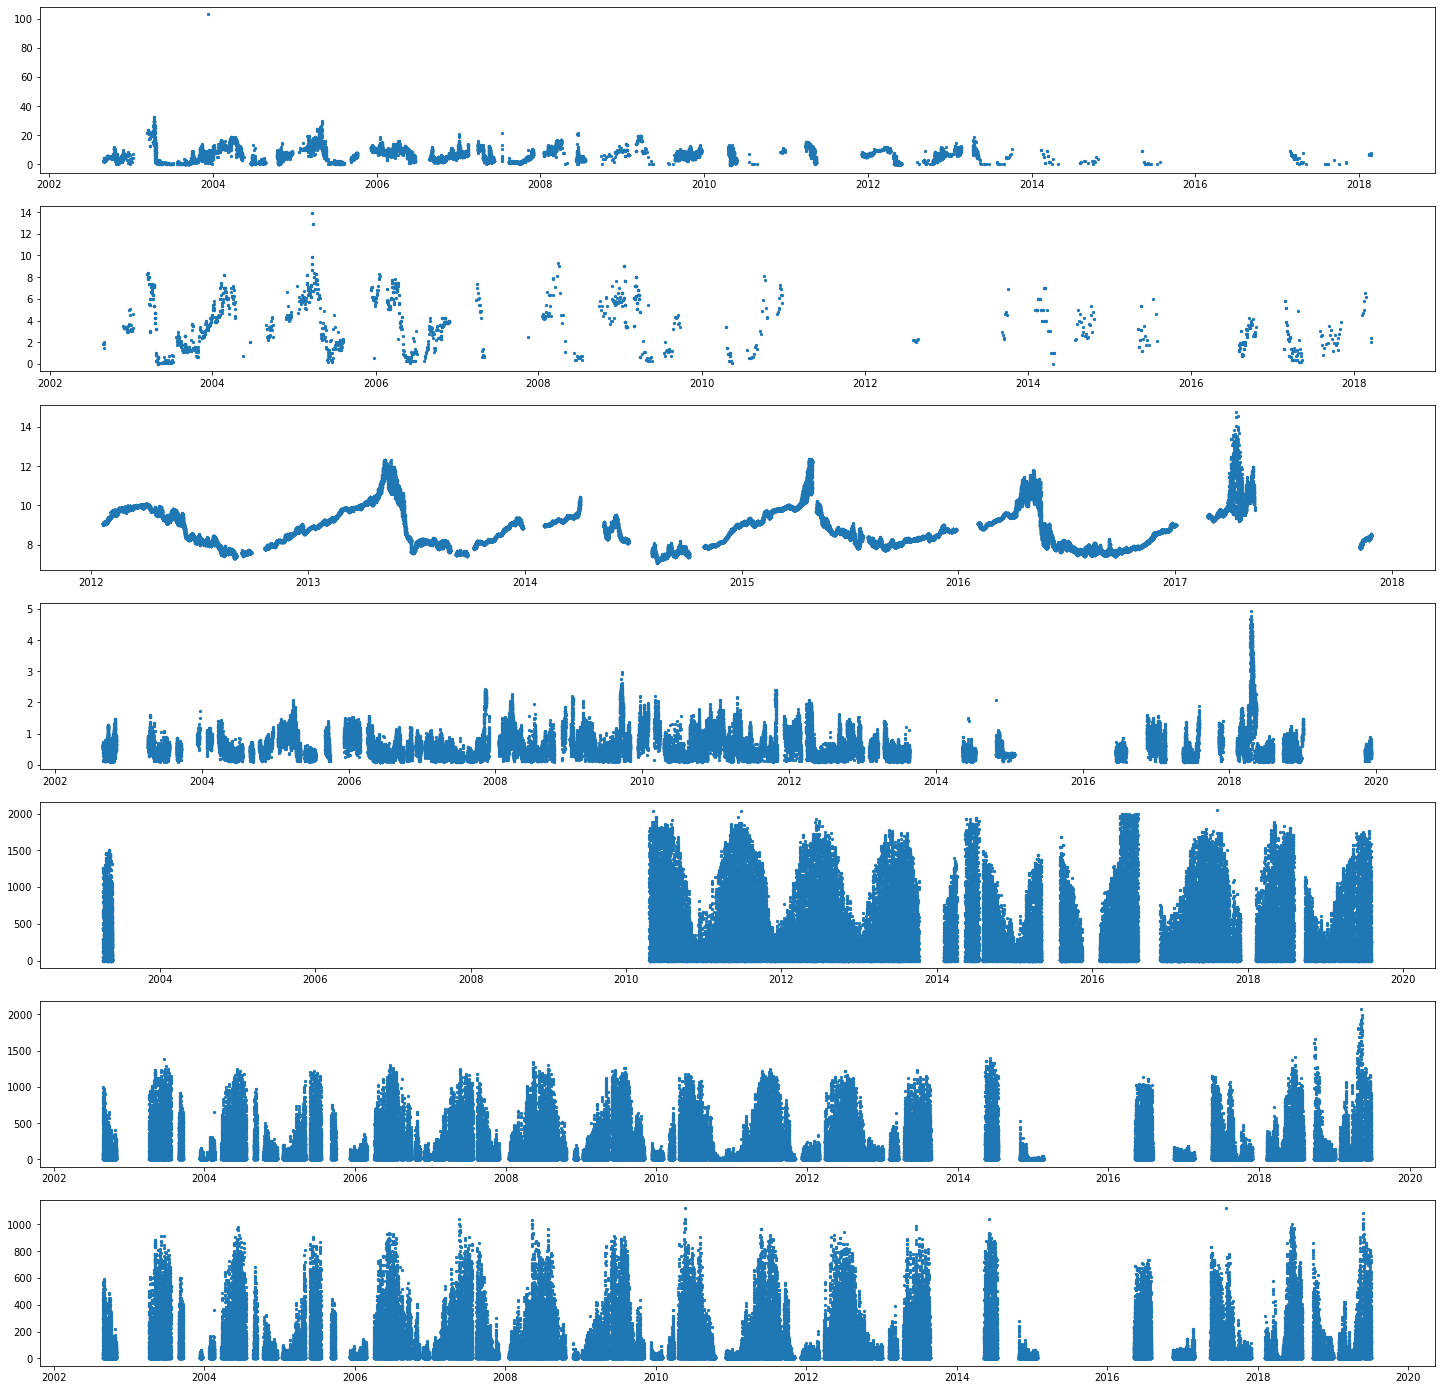

In [61]:
df1 = pd.read_csv("clean_data.csv", parse_dates = ["dateTime"])
fig, ax = plt.subplots(7, 1, figsize=(25, 25))
ax[0].scatter(df1["dateTime"], df1["tox"], s = 5, marker = 'o')
ax[1].scatter(df1["dateTime"], df1['sil'], s = 5, marker = 'o')
ax[2].scatter(df1["dateTime"], df1['o2'], s = 5, marker = 'o')
ax[3].scatter(df1["dateTime"], df1['kd'], s = 5, marker = 'o')
ax[4].scatter(df1["dateTime"], df1['par_0'], s = 5, marker = 'o')
ax[5].scatter(df1["dateTime"], df1['par_1'], s = 5, marker = 'o')
ax[6].scatter(df1["dateTime"], df1['par_2'], s = 5, marker = 'o')
fig.show()

In [62]:
df1 = pd.read_csv("clean_data.csv", parse_dates = ["dateTime"])
df1 = df1.set_index("dateTime")
df1 = df1['tox']
df1 = df1.dropna()
#df1.resample('Y').size().plot.bar()

In [63]:
df1 = pd.read_csv("clean_data.csv", parse_dates = ["dateTime"])
df1 = df1.set_index("dateTime")
df1 = df1['sil']
df1 = df1.dropna()
#df1.resample('Y').size().plot.bar()

From these we see that there are large time gaps and so the data is not reliable enough to read into the effects of the offshore wind farm on water quality over time. We remove these columns and overwrite our previous csv. For o2 we have no values before 2012 so we drop this as well.

In [64]:
df = pd.read_csv("clean_data.csv", parse_dates = ["dateTime"])
df = df.set_index('dateTime')
df = df.drop(columns = ["tox", 'sil', 'o2'], errors = 'ignore')
df.to_csv('clean_data.csv', sep = ',', index = 'False')

Checking this has worked.

C:\Users\Reuben\AppData\Local\Temp\ipykernel_1140\2339808121.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


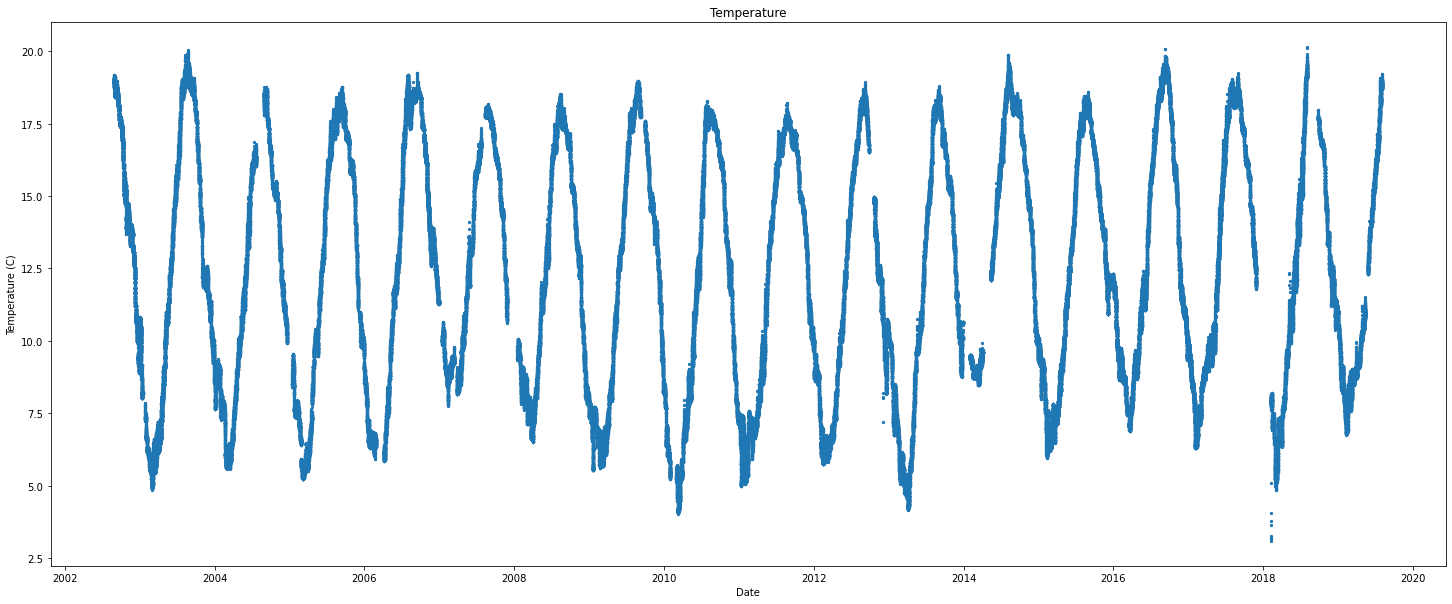

In [65]:
df1 = pd.read_csv("clean_data.csv", parse_dates = ["dateTime"])
df1 = df1.set_index('dateTime')
#plot temp
fig, ax = plt.subplots(figsize=(25, 10))
ax.scatter(df1.index, df1["temp"], s = 5, marker = 'o')
ax.set_title("Temperature")
ax.set_ylabel("Temperature (C)")
ax.set_xlabel("Date")
fig.show()


In [66]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 2463-5455

 Directory of C:\Users\Reuben\OneDrive - hull.ac.uk\Data Analysis & Visualisation\DAV Assessment\Cefas_smartbuoy

25/11/2022  21:52    <DIR>          .
25/11/2022  21:52    <DIR>          ..
25/11/2022  15:10            48,902 02_month.png
25/11/2022  15:10            35,725 02conc.png
25/11/2022  21:51    <DIR>          Annual_Figures
19/12/2022  17:04        16,675,627 clean_data.csv
19/12/2022  17:03        14,492,341 clean_data1.csv
19/12/2022  17:03         3,732,617 clean_data2.csv
25/11/2022  15:10            31,639 fluors.png
25/11/2022  15:10            62,242 fluors_month.png
25/11/2022  15:10         4,303,964 fluors_time.png
25/11/2022  15:10         7,457,056 ftu_time.png
25/11/2022  15:10         1,461,284 heatMap.png
25/11/2022  15:10        23,158,205 interp_data.csv
25/11/2022  15:10           147,027 interpolating cefas.ipynb
25/11/2022  15:10            36,069 Kd.png
25/11/2022  15:10            66,

In [67]:
ls *.csv

 Volume in drive C has no label.
 Volume Serial Number is 2463-5455

 Directory of C:\Users\Reuben\OneDrive - hull.ac.uk\Data Analysis & Visualisation\DAV Assessment\Cefas_smartbuoy

19/12/2022  17:04        16,675,627 clean_data.csv
19/12/2022  17:03        14,492,341 clean_data1.csv
19/12/2022  17:03         3,732,617 clean_data2.csv
25/11/2022  15:10        23,158,205 interp_data.csv
25/11/2022  15:10       146,360,601 WESTGAB.csv
25/11/2022  15:10        15,097,489 WESTGAB_2.csv
25/11/2022  15:10        34,779,790 WESTGAB2.csv
25/11/2022  15:10         1,872,717 WESTGAB2_2.csv
25/11/2022  15:10        14,371,530 WESTGAB2PAR.csv
25/11/2022  15:10        42,393,256 WESTGABPAR.csv
25/11/2022  15:10         4,565,940 WG2O2SAT.csv
              11 File(s)    317,500,113 bytes
               0 Dir(s)  105,438,879,744 bytes free


Now we add in data found from alternative online sources. This data is hourly, so we'll compute hourly rolling averages for the data we have already first.

In [68]:
df = pd.read_csv('clean_data.csv', parse_dates = ['dateTime'])
df = df.set_index('dateTime')
#compute hourly rolling averages
df['temp'] = df['temp'].rolling('1h').mean()
df['sal'] = df['sal'].rolling('1h').mean()
df['ftu'] = df['ftu'].rolling('1h').mean()
df['fluors'] = df['fluors'].rolling('1h').mean()
df['kd'] = df['kd'].rolling('1h').mean()
df['par_0'] = df['par_0'].rolling('1h').mean()
df['par_1'] = df['par_1'].rolling('1h').mean()
df['par_2'] = df['par_2'].rolling('1h').mean()
#extract data which lands on the hour
df = df[df.index.minute == 0]

df1 = pd.read_csv('..\CMEMS_Data\CMEMS_SST_SSS.csv', parse_dates = ['Unnamed: 0'])
df1 = df1.rename(columns = {'Unnamed: 0' : 'dateTime', 'CMEMS_SST' : 'surf_temp', 'CMEMS_SSS' : 'surf_sal'})
df1 = df1.set_index('dateTime')
df1 = df1['2002-08-28 14:00:00':'2019-12-07 15:00:00']

df2 = pd.read_csv('..\CMEMS_Data\ERA5_solar.csv', parse_dates = ['Unnamed: 0'])
df2 = df2.rename(columns = {'Unnamed: 0' : 'dateTime', 'SSR' : 'solar', 'SSRD' : 'direct_solar'})
df2 = df2.set_index('dateTime')
df2 = df2['2002-08-28 14:00:00':'2019-12-07 15:00:00']
#at night the solar ratiation is negligible so we can set it to 0
df2.loc[df2['solar'] < 0.0000001, 'solar'] = 0

df = pd.merge(df, df1, how = 'outer', left_index = True, right_index = True)
df = pd.merge(df, df2, how = 'outer', left_index = True, right_index = True)

#re-inputing phase values after empty rows were introduced by the new data

for col in df.columns:
    print(f"Percentage of missing {col} values = {100*df[col].isna().sum()/len(df) :.2f}")

df.to_csv('clean_ext_data.csv', sep = ',', index = 'False')

Percentage of missing temp values = 13.65
Percentage of missing sal values = 24.25
Percentage of missing ftu values = 26.20
Percentage of missing fluors values = 30.07
Percentage of missing kd values = 70.98
Percentage of missing par_0 values = 74.76
Percentage of missing par_1 values = 63.33
Percentage of missing par_2 values = 62.80
Percentage of missing surf_temp values = 0.00
Percentage of missing surf_sal values = 0.00
Percentage of missing solar values = 0.00
Percentage of missing direct_solar values = 0.00


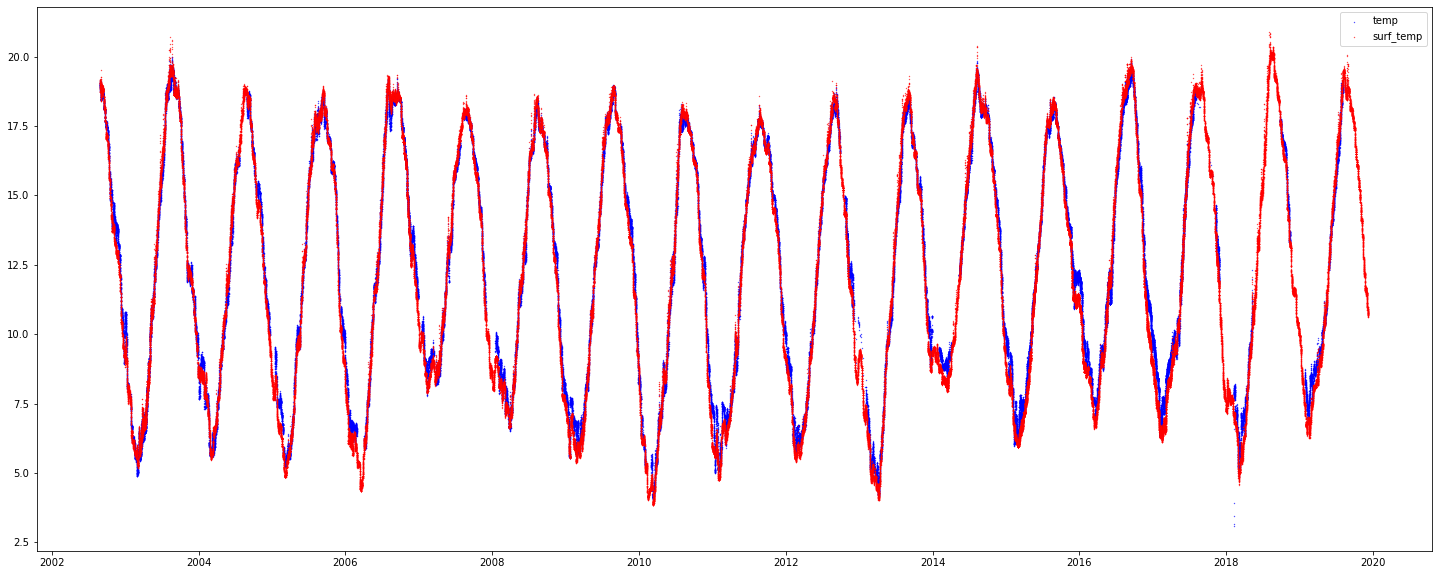

In [69]:
#plot temp and surface temp on same axis
fig, ax = plt.subplots(1, 1, figsize=(25, 10))
ax.scatter(df.index, df['temp'], s = 0.1, color = 'blue', label = 'temp')
ax.scatter(df.index, df['surf_temp'], s = 0.1, color = 'red', label = 'surf_temp')
ax.legend()

Looking at this we see that the data found online matches our data very well. We will use this online data instead of the buoy data to reduce the number of missing values we have.

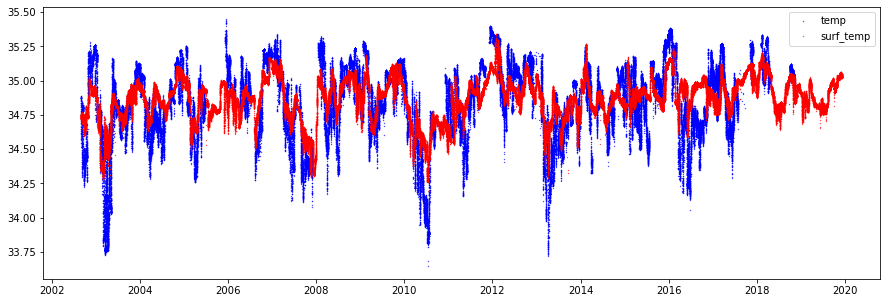

In [70]:
#plot sal and surface sal on same axis
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.scatter(df.index, df['sal'], s = 0.1, color = 'blue', label = 'temp')
ax.scatter(df.index, df['surf_sal'], s = 0.1, color = 'red', label = 'surf_temp')
ax.legend()


The fit of the online salinity data is not good enough for it to be a reasonable replacement for our missing buoy data.

<AxesSubplot:>

<Figure size 2400x1600 with 0 Axes>

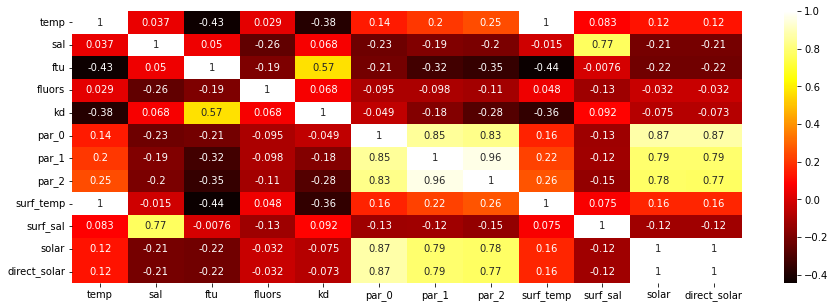

In [71]:
corr = df.drop('phase', axis = 1, errors = 'ignore').corr()
plt.figure(dpi = 400)
plt.figure(figsize=(15, 5))
sns.heatmap(corr, cmap= "hot", annot = True)

We see a strong correlation betwewn the par values and the solar radiation. Since the par values are so defficient we'll use the solar radiation parameters instead. The 2 different solar radiation values are very similar so for computational efficiency we'll just use the direct solar radiation value.

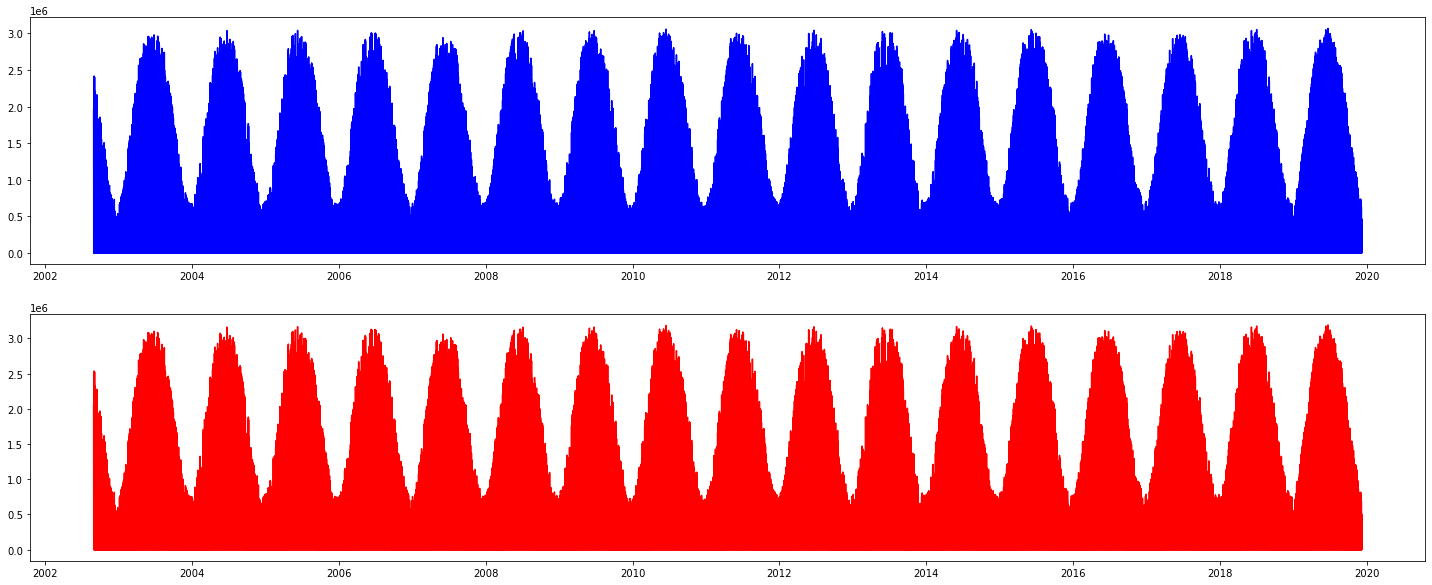

In [72]:
#plot sal and surface sal on same axis
fig, ax = plt.subplots(2, 1, figsize=(25, 10))
ax[0].plot(df.index, df['solar'], color = 'blue', label = 'temp')
ax[1].plot(df.index, df['direct_solar'], color = 'red', label = 'surf_temp')
#ax.legend()

In [73]:
df = df.drop(['solar', 'par_0', 'par_1', 'par_2', 'temp', 'surf_sal'], axis = 1)
df

,sal,ftu,fluors,kd,surf_temp,direct_solar
dateTime,,,,,,
2002-08-28 14:00:00,34.66125,6.0425,0.6500,0.68275,18.728000,2.048638e+06
2002-08-28 15:00:00,34.61900,4.2225,0.8100,0.62900,18.735000,1.785222e+06
2002-08-28 16:00:00,34.62100,2.9675,0.8250,0.24900,18.772000,1.377425e+06
2002-08-28 17:00:00,34.68925,3.1400,0.9575,0.52075,18.818000,8.836671e+05
2002-08-28 18:00:00,34.79275,4.8675,0.9175,0.63000,18.828000,3.774992e+05
...,...,...,...,...,...,...
2019-12-07 11:00:00,NaN,NaN,NaN,0.27050,10.654999,4.475585e+05
2019-12-07 12:00:00,NaN,NaN,NaN,0.44500,10.694999,5.038080e+05
2019-12-07 13:00:00,NaN,NaN,NaN,0.46150,10.731999,4.524881e+05


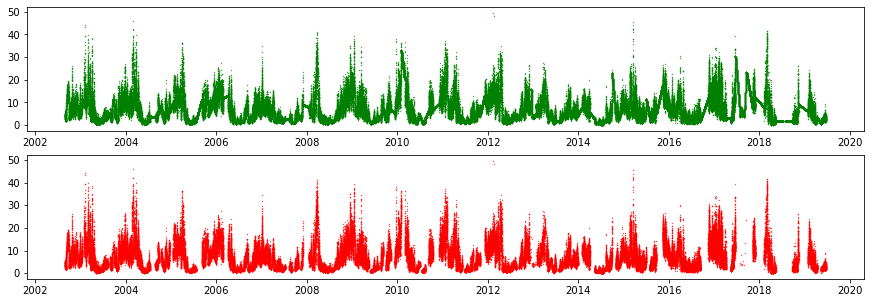

In [74]:
x_ftu_2 = df['ftu'].interpolate(method="linear", limit = 1500, limit_direction = 'both',limit_area = 'inside') #15 days
fig, ax = plt.subplots(2, 1, figsize=(15, 5))
ax[0].scatter(df.index, x_ftu_2, s = 0.1, color = 'green', label = 'o2')
ax[1].scatter(df.index, df['ftu'], s = 0.1, color = 'red', label = 'o2')
#ax.legend()

we can't really interpolate ftu very well so well drop the nan values.

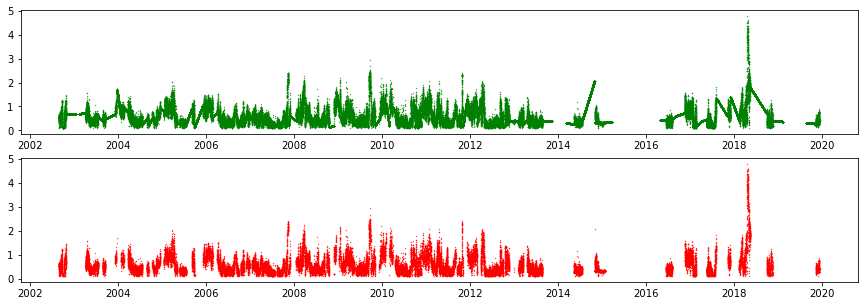

In [75]:
x_ftu_2 = df['kd'].interpolate(method="linear", limit = 2000, limit_direction = 'both',limit_area = 'inside') #15 days
fig, ax = plt.subplots(2, 1, figsize=(15, 5))
ax[0].scatter(df.index, x_ftu_2, s = 0.1, color = 'green', label = 'o2')
ax[1].scatter(df.index, df['kd'], s = 0.1, color = 'red', label = 'o2')
#ax.legend()


We could possibly use Kd values from before 2014 but even then a lot are missing. 

Now let's add a column of labels for the various construction phases:
0.   Before any windfarm construction ( - 05/10/2009)
1.   During construction of Greater Gabbard (05/10/2009 - 07/09/2012)
2.   Before construction of Greater Galloper (07/09/2012 - Summer 2016) NEED EXACT DATE!
3.   During construction of Greater Galloper (Summer 2016 - March 2018)
4.   After construction of both wind farms (March 2018)

In [76]:
df["phase"] = 0 
df.loc[(df.index >= "2009-10-05") & (df.index < "2012-09-07"), "phase"] = 1
df.loc[(df.index >= "2012-09-07") & (df.index < "2015-07-01"), "phase"] = 2
df.loc[(df.index >= "2015-07-01") & (df.index < "2018-03-01"), "phase"] = 3
df.loc[df.index >= "2018-03-01", "phase"] = 4
df.to_csv('clean_ext_data.csv', sep = ',', index = 'False')

#df = df[df.index <= '2013-06-06']
for col in df.columns:
    print(f"Percentage of missing {col} values = {100*df[col].isna().sum()/len(df) :.2f}")
df

Percentage of missing sal values = 24.25
Percentage of missing ftu values = 26.20
Percentage of missing fluors values = 30.07
Percentage of missing kd values = 70.98
Percentage of missing surf_temp values = 0.00
Percentage of missing direct_solar values = 0.00
Percentage of missing phase values = 0.00


,sal,ftu,fluors,kd,surf_temp,direct_solar,phase
dateTime,,,,,,,
2002-08-28 14:00:00,34.66125,6.0425,0.6500,0.68275,18.728000,2.048638e+06,0
2002-08-28 15:00:00,34.61900,4.2225,0.8100,0.62900,18.735000,1.785222e+06,0
2002-08-28 16:00:00,34.62100,2.9675,0.8250,0.24900,18.772000,1.377425e+06,0
2002-08-28 17:00:00,34.68925,3.1400,0.9575,0.52075,18.818000,8.836671e+05,0
2002-08-28 18:00:00,34.79275,4.8675,0.9175,0.63000,18.828000,3.774992e+05,0
...,...,...,...,...,...,...,...
2019-12-07 11:00:00,NaN,NaN,NaN,0.27050,10.654999,4.475585e+05,4
2019-12-07 12:00:00,NaN,NaN,NaN,0.44500,10.694999,5.038080e+05,4
2019-12-07 13:00:00,NaN,NaN,NaN,0.46150,10.731999,4.524881e+05,4
